In [1]:
import pandas as pd
from plapt import Plapt

In [2]:
benchmark_data = pd.read_csv("data\\Test2016_290.csv")
    
# Extract sequences and smiles from benchmark dataset
prot_seqs = benchmark_data['seq'].tolist()
mol_smiles = benchmark_data['smiles_can'].tolist()
experimental_pKd = benchmark_data['neg_log10_affinity_M'].tolist()

In [3]:
plapt = Plapt("models/predictionModule.onnx")

In [5]:
mol_smiles

['Cn1nc(-c2ccc3c(c2)OCO3)cc1N',
 'CC(=O)Nc1ccsc1C(=O)O',
 '[NH3+]CCc1ccccc1',
 'O=C1N[C@@H]2[C@@H](O)[C@@H](O)[C@H](O)[C@@H](CO)N2C1=O',
 'O=C(O)c1ccc2c(c1)OCO2',
 'NS(=O)(=O)c1ccccc1',
 'O=C1C=C(Nc2nnn[nH]2)CCC1',
 'CC[C@H]1C(=O)N(c2nnn[nH]2)N=C1C',
 '[NH3+]Cc1ccc(C(=O)O)cc1',
 'CC(=O)Oc1c(C)cccc1C(=O)O',
 'COc1ccc(S(N)(=O)=O)cc1',
 'O=C1Cc2ccccc2/C1=C\\c1ccc2c(c1C(=O)O)OCO2',
 'O=C1Nc2ccccc2[C@]12CC[NH2+]C2',
 'C[C@H](C(=O)O)N1C(=O)[C@@H]2[C@@H]3CC[C@@H](C3)[C@@H]2C1=O',
 'Cc1cc(C)nc(N)n1',
 'Nc1c(F)cccc1C(=O)O',
 'Oc1c(Br)cc(Cl)cc1C[N@H+]1CC[C@H]([N@@H+]2CC[C@@H](O)CC2)CC1',
 'CCN(CC)C(=O)c1ccc(O)c(OC)c1',
 'C[C@@H]1CCC[C@H](C(=O)O)N1C(=O)CCS',
 '[NH3+]CCc1c[nH]c2ccc(O)cc12',
 'Nc1ccc2cc3ccc(N)cc3nc2c1',
 'C=CC[N@H+](Cc1ccccc1C(=O)NCc1ccccc1)Cc1ccc2c(c1C(=O)O)OCO2',
 'COc1ccc2c(CC(=O)O)coc2c1',
 'Oc1ccnc2cc(Cl)ccc12',
 'Cc1ccnc(N)c1[N+](=O)[O-]',
 'C[NH+]1CCN(c2cccc(C[NH3+])c2)CC1',
 'C#Cc1cc(C#CCOc2ccccc2)cc(C[N@@H+]2CC[C@@H]([NH+](CC)CC)CC2)c1O',
 '[NH3+][C@@H]1C[C@H](O)[C@H](O)[C

In [7]:
predictions = plapt.predict_affinity(prot_seqs,mol_smiles)
predictions = pd.DataFrame(predictions)

In [8]:
predictions

,neg_log10_affinity_M,affinity_uM
0,3.435223,367.093688
1,1.929570,11760.608188
2,3.477233,333.247369
3,4.564945,27.230432
4,2.521885,3006.870819
...,...,...
285,5.737400,1.830627
286,6.005179,0.988146
287,5.201710,6.284779
288,8.542068,0.002870


In [25]:
plapt.set_prediction_module("C:\\Users\\tatwo\\Documents\\WELP-PLAPT\\models\\affinity_predictor1704185750.onnx")
predictions = plapt.predict_affinity(prot_seqs,mol_smiles)
predictions = pd.DataFrame(predictions)

In [29]:
import json

def export_cached_features_to_json(plapt, file_path):
    # Convert the cached features to a list of lists
    features_list = [feature.numpy().tolist() for feature_batch in plapt.cache.values() for feature in feature_batch]

    # Write the list of lists to a JSON file
    with open(file_path, 'w') as file:
        json.dump(features_list, file)

# Usage
# Assuming plapt is your Plapt object
export_cached_features_to_json(plapt, 'cached_features.json')


In [30]:
with open("benchmark_inputs.json", 'w') as file:
        json.dump(experimental_pKd, file)

In [26]:
predicted_pKd = predictions["neg_log10_affinity_M"]

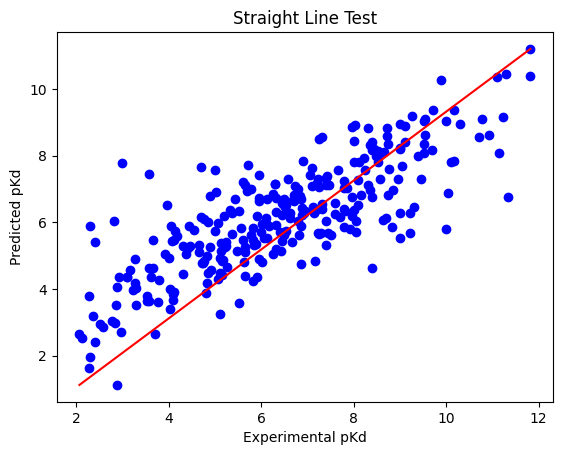

Mean Squared Error (MSE): 1.77784111045414
Mean Absolute Error (MAE): 0.9996971665854308
Root Mean Squared Error (RMSE): 1.333357082875454
Pearson's Correlation Coefficient: 0.8003204220211024


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Plotting the straight line test
plt.scatter(experimental_pKd, predicted_pKd, color='blue')
plt.plot([min(experimental_pKd), max(experimental_pKd)], [min(predicted_pKd), max(predicted_pKd)], color='red') # Line
plt.xlabel('Experimental pKd')
plt.ylabel('Predicted pKd')
plt.title('Straight Line Test')
plt.show()

# Calculating Metrics
mse = mean_squared_error(experimental_pKd, predicted_pKd)
mae = mean_absolute_error(experimental_pKd, predicted_pKd)
rmse = np.sqrt(mse)
pearson_corr, _ = pearsonr(experimental_pKd, predicted_pKd)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Pearson's Correlation Coefficient:", pearson_corr)
